In [1]:
# uses pyCaret to find optimise model and tune it
# check version
from library.common import Core
core = Core()

from pycaret.utils import version
from pycaret.regression import *
version()

'2.3.5'

In [2]:
# Set up pyCaret Regression
# load dataset
regions_list  = core.list_of_regions
r = 2
cluster = regions_list[r]
print(cluster)

data = core.get_cluster_regression_datas(cluster = cluster, first = core.start_year, last = core.stop_year)
reg0 = setup(data, target = 'co2', session_id=123, log_experiment=True,
             normalize = core.regression_normalize, normalize_method = core.normalize_method,
             remove_outliers = core.remove_outliers, outliers_threshold = core.outliers_threshold,
             verbose = False, silent = core.silent_mode,
             experiment_name= f'carbon emission Cluster {r}')

best_model = compare_models(fold= core.regression_cv, sort = core.error_optimise, round = 1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,192.4,76505.7,254.7,1.0,0.0,0.0,0.1
llar,Lasso Least Angle Regression,249.8,107050.8,320.6,1.0,0.0,0.0,0.0
lasso,Lasso Regression,252.6,107301.8,321.6,1.0,0.0,0.0,0.5
lr,Linear Regression,259.3,108384.0,325.7,1.0,0.0,0.0,1.0
br,Bayesian Ridge,258.5,110609.4,327.1,1.0,0.0,0.0,0.0
ada,AdaBoost Regressor,318.8,157653.7,392.8,1.0,0.0,0.0,0.0
rf,Random Forest Regressor,290.5,164109.7,368.7,1.0,0.0,0.0,0.1
gbr,Gradient Boosting Regressor,296.8,180926.7,398.6,1.0,0.0,0.0,0.0
huber,Huber Regressor,320.2,199056.5,431.0,1.0,0.0,0.0,0.0
omp,Orthogonal Matching Pursuit,439.5,259142.1,507.9,0.9,0.0,0.0,0.0


In [3]:
# selected_model = 'et'
# model = create_model(selected_model)
# tuned_model = tune_model(model, n_iter=100, optimize = core.error_optimise, round = 1)

In [4]:
selected_model = 'llar'
model = create_model(selected_model)
tuned_model = tune_model(model, n_iter=100, optimize = 'MSE', round = 1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,164.6,37401.7,193.4,1.0,0.0,0.0
1,369.0,154456.0,393.0,1.0,0.0,0.0
2,211.5,64430.1,253.8,1.0,0.0,0.0
3,263.8,160680.4,400.8,1.0,0.0,0.0
4,255.9,109393.1,330.7,1.0,0.0,0.0
5,279.5,90017.0,300.0,1.0,0.0,0.0
6,344.8,181758.9,426.3,0.9,0.0,0.0
7,276.6,131073.5,362.0,0.8,0.0,0.0
8,102.9,15708.0,125.3,1.0,0.0,0.0
9,224.6,73603.9,271.3,1.0,0.0,0.0


In [5]:
# selected_model = 'lasso'
# model = create_model(selected_model)
# tuned_model = tune_model(model, n_iter=100, optimize = 'MSE', round = 1)

In [6]:
tuned_model

LassoLars(alpha=1.0, copy_X=True, eps=1e-05, fit_intercept=True, fit_path=True,
          jitter=None, max_iter=500, normalize=False, positive=False,
          precompute='auto', random_state=123, verbose=False)

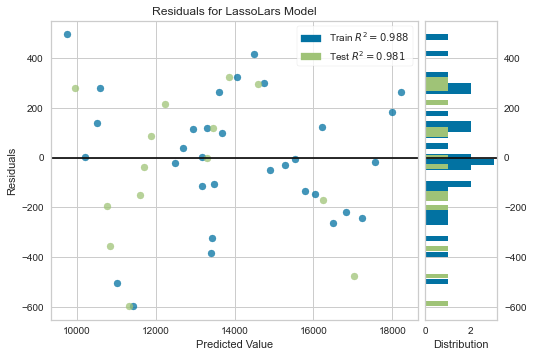

In [7]:
plot_model(tuned_model)

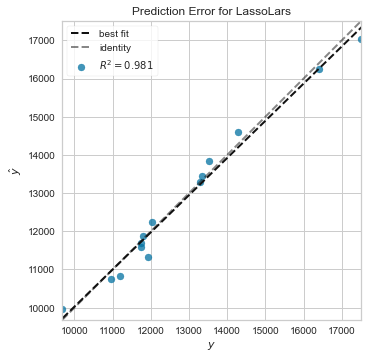

In [8]:

plot_model(tuned_model, plot = 'error')

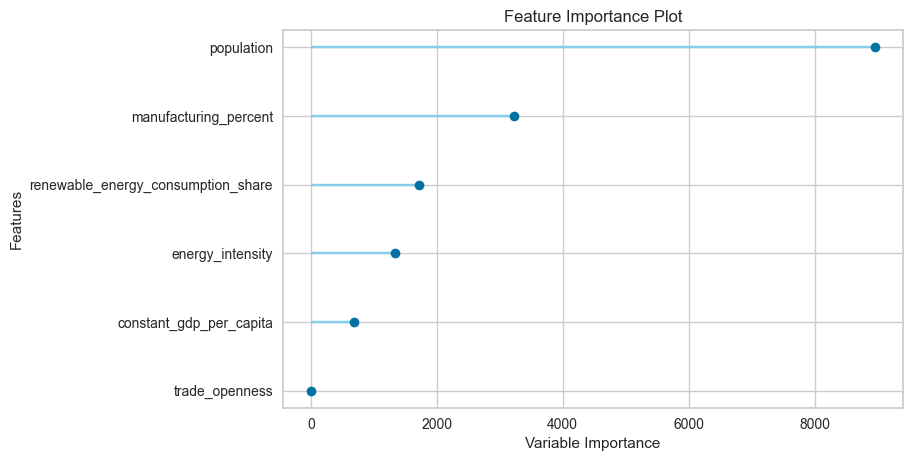

In [9]:

plot_model(tuned_model, plot = 'feature')

In [10]:

evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [11]:
try:
    interpret_model(tuned_model)
except:
    print('No plot for this model')


No plot for this model


In [12]:
try:
    interpret_model(tuned_model, plot = 'correlation')
except:
    print('No plot for this model')

No plot for this model


In [13]:
try:
    interpret_model(tuned_model, plot = 'reason', observation = 12)
except:
    print('No plot for this model')

No plot for this model


In [14]:
final_model = finalize_model(tuned_model)
data = core.get_forecasts()
data = data.drop(columns =  ['co2'])
data_unseen = data.loc[data.cluster.eq(cluster),]

# generate predictions on unseen data
predictions = predict_model(final_model, data = data_unseen)
predictions = predictions.rename(columns = {'Label': 'co2'})
predictions[['year', 'co2']]

,year,co2
0,2017,18436.358264
1,2018,18624.696136
2,2019,18810.998667
3,2020,18996.653069
